# **Facial Emotion Detection**

## **Problem Definition**

**The context:**
Human emotion detection (HED) is pivotal to AI based solutions. To have AI based solutions deliver a more robust human like interaction or output, machines need to be able to understand the context of the interaction. This is only possible if we train the machine on non-verbal communication such as Facial Emotion Detection (FED). AI solutions for customer service, healthcare, and safety can be implemented with the ability of trained FED
model with a human like understanding to detect if service delivered to customer was positive, or a patient's reaction to an environment, or if a situation is stressful for individuals.<br>

**The objectives:**
The objective is to use machine learning techniques to build a computer vision model that can identify human facial emotions by examining facial expressions. The deep learning model will use multi class classification to output emotion prediction when a human facial emotion image is presented to the model as input.<br>

**The key questions:** What are the key questions that need to be answered?<br>
- Do we have a dataset that is balanced and processed that can be used?<br>
- What is our output or which emotions are we trying to detect?<br>
- What kind of neural network model should we use (NN, CNN, or pretrained NN)?<br>
- How good is our model and is it accurate enough to be useful?<br>

**The problem formulation:**
Is it possible to build a machine learning model that can detect human facial expressions which can be applied in various practical use to accurately interpret human emotions.


## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

## **Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import zipfile


# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten, Conv2D, BatchNormalization
from tensorflow.keras.layers import Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

import keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, EfficientNetB1
from tensorflow.keras.models import Model, Sequential
from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score
from datetime import datetime
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from tensorflow.keras.preprocessing import image

### **Let us load and unzip the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Colab Notebooks/MIT_Capstone/Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
os.getcwd()

'/content'

In [ ]:
#Initializing directory paths
TRAIN_DIR = '/content/Facial_emotion_images/train/'
TEST_DIR = '/content/Facial_emotion_images/test/'

In [ ]:
print(TRAIN_DIR)

/content/Facial_emotion_images/train/


In [ ]:
def load_dataset(directory):
    image_paths = []
    labels = []

    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)

        print(label, "Completed")

    return image_paths, labels

In [ ]:
## convert into dataframe for data verification of train and test dataset
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()
train.dtypes
train.head(5)

neutral Completed
happy Completed
sad Completed
surprise Completed


,image,label
0,/content/Facial_emotion_images/train/happy/324...,happy
1,/content/Facial_emotion_images/train/happy/309...,happy
2,/content/Facial_emotion_images/train/sad/11608...,sad
3,/content/Facial_emotion_images/train/neutral/3...,neutral
4,/content/Facial_emotion_images/train/neutral/1...,neutral


In [ ]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()
test.head(5)

neutral Completed
happy Completed
sad Completed
surprise Completed


,image,label
0,/content/Facial_emotion_images/test/neutral/74...,neutral
1,/content/Facial_emotion_images/test/neutral/74...,neutral
2,/content/Facial_emotion_images/test/neutral/73...,neutral
3,/content/Facial_emotion_images/test/neutral/73...,neutral
4,/content/Facial_emotion_images/test/neutral/74...,neutral


Image Size is =  (48, 48)


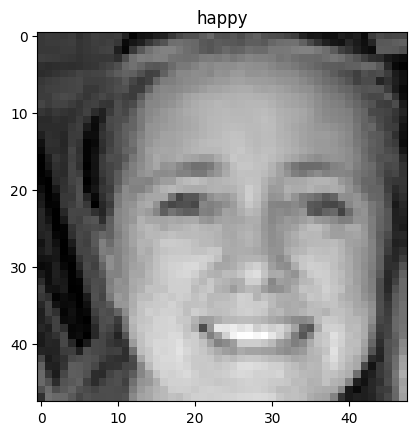

In [ ]:
#Display an image in grayscale to verify
from PIL import Image
img = Image.open(train['image'][1])
plt.imshow(img, cmap='gray');
plt.title(train['label'][1])
print('Image Size is = ', img.size)

Image Size is =  (48, 48)


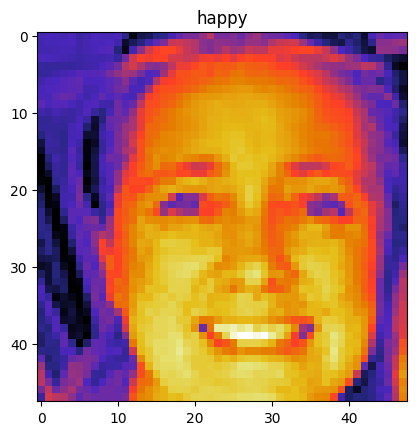

In [ ]:
#Display an image in color to verify
from PIL import Image
img = Image.open(train['image'][1])
plt.imshow(img, cmap='CMRmap');
plt.title(train['label'][1])
print('Image Size is = ', img.size)

In [ ]:
#Let's set picture size
picture_size = 48
folder_path = "Facial_emotion_images/"

**Data Exploration**
We have 15109 training image dataset and 128 test dataset. The images are in grayscale of size 48 x 48. The train and test data folders are separate and does not need to be processed.

## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

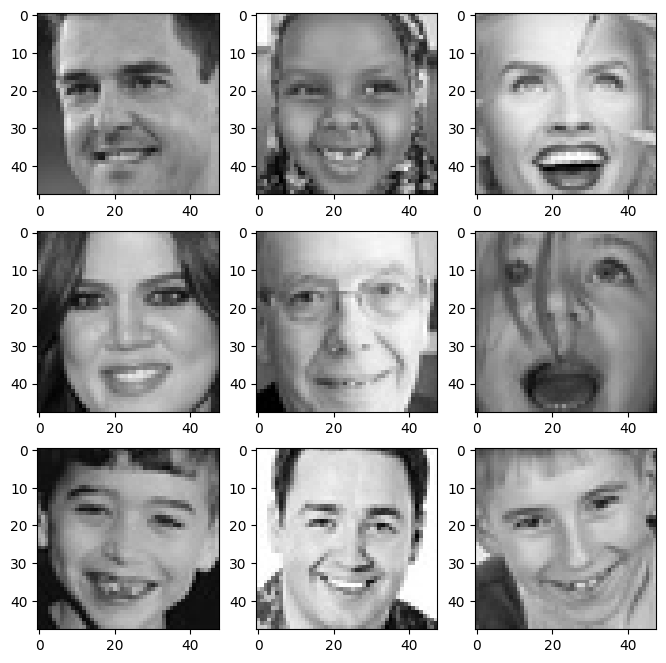

In [ ]:
expression = 'happy'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**
The dataset represents happy expressions of various age and gender group. Images also have watermark which may or may not impact the final training accuracy. We have a profile view and other background visible in the image.

### **Sad**

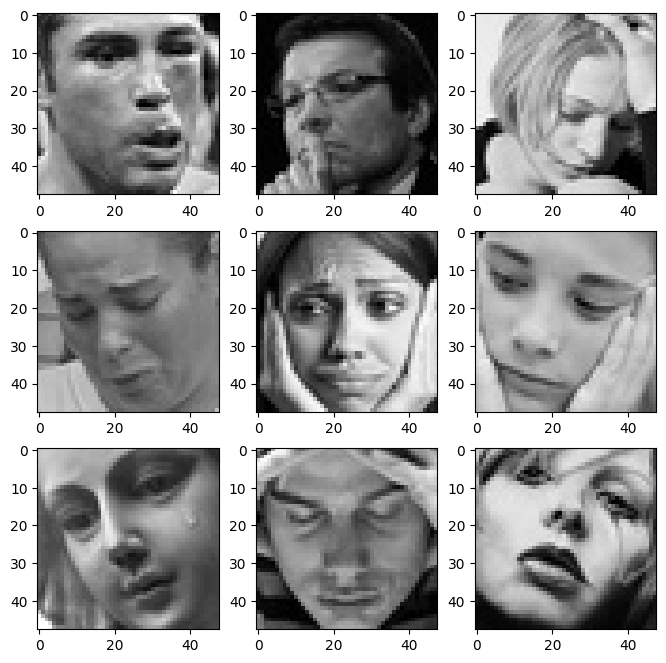

In [ ]:
expression = 'sad'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**
Sad images have emotions that are close to upset or neutral. Although this might help generalize the model it can also lead to misclassification. Image augmentation technique used in CNN can help with this problem.

### **Neutral**

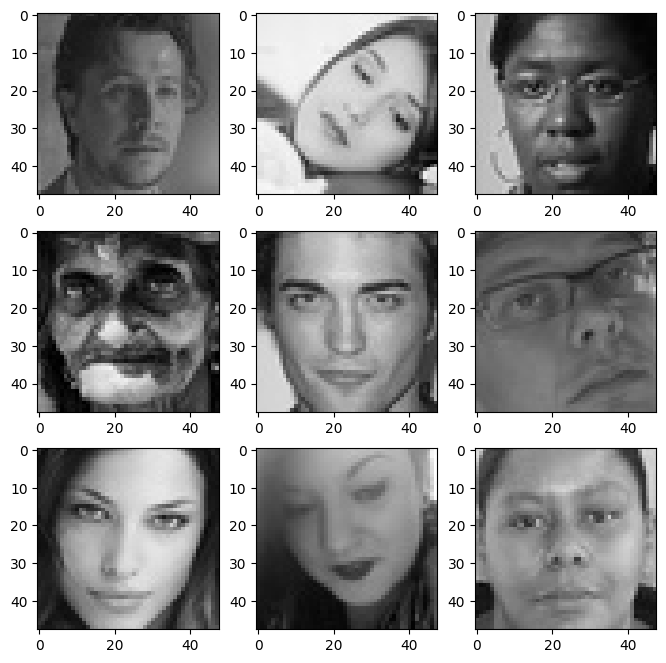

In [ ]:
expression = 'neutral'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**
Some of the neutral images have markings and hair covering the face. Some look like sad or even surprise image. However, full front facial view in relation with other clearly visible facial features should help the model to select the right defining features.

### **Surprised**

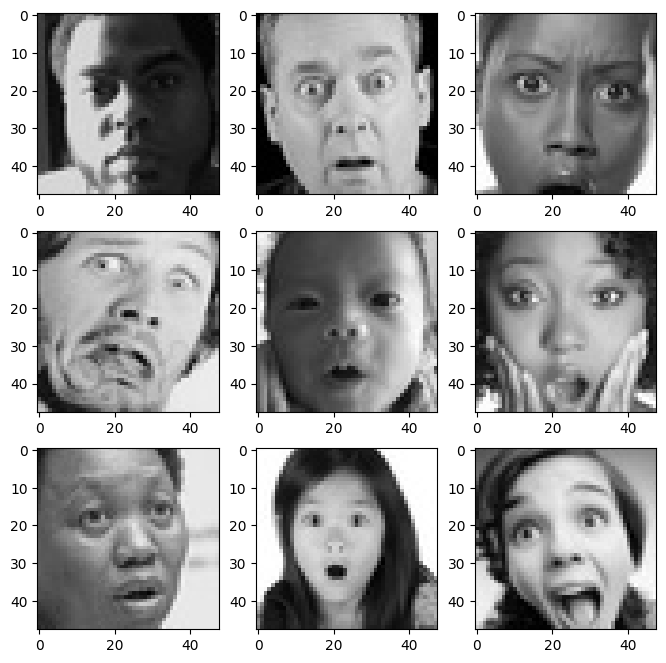

In [ ]:
expression = 'surprise'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**
Although the dataset has watermark and various angle/zoom, all immages have both eye and mouth with distinguishing look of being surprised.

## **Checking Distribution of Classes**

<Axes: xlabel='label', ylabel='Count'>

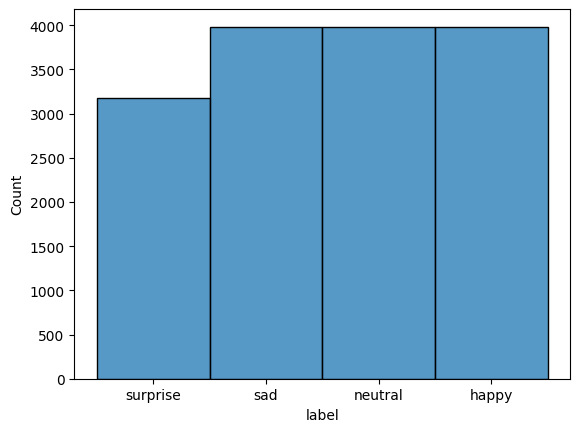

In [ ]:
#Let's look at the training data distribution
sns.histplot(train['label'].sort_values(ascending=False))

In [ ]:
# Let's look at the available number of training data
train['label'].value_counts()

sad         3982
neutral     3978
happy       3976
surprise    3173
Name: label, dtype: int64

**Observations and Insights:**
The training dataset contains somewhat balanced data of 3982 sad, 3978 neutral, 3976 happy, and 3173 surprise images. We may have a lower accuracy detecting surprise emotions because of slightly lower training data (~800 images). A confusion matrix will enable us to investigate if this is a detrimental factor. At this point data normalization may be too costly and we can ignore the class imbalance because it is not too high.

**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [ ]:
#Let's pre-process and load the images as grayscale
batch_size = 32
img_size = 48
datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale= 1./255,
                                    shear_range= 0.3)
train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size,img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                  brightness_range= (0.,2.),
                                  rescale=1./255,
                                  shear_range= 0.3)

validation_set=datagen_validation.flow_from_directory(folder_path+"validation",
                                    target_size=(img_size,img_size),
                                    color_mode = 'grayscale',
                                    batch_size = batch_size,
                                    class_mode = 'categorical',
                                    shuffle = True)

datagen_test = ImageDataGenerator(horizontal_flip = True,
                                  brightness_range=(0.,2.),
                                  rescale = 1./ 255,
                                  shear_range=0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                       target_size = (img_size,img_size),
                                      color_mode= 'grayscale',
                                      batch_size=batch_size,
                                      class_mode = 'categorical',
                                            shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

- It appears CNN is the right approach because of the complexity of the dataset. ANN would not be as accurate due to its simple and shallow network. CNN has the ability apply filter strides retaining the ability to understand the immage prior to flattening. The abilty of weight sharing in CNNs will provide the model with retaining the total value of the image, rather than just a single point.

### **Creating the Base Neural Network**

# The Base Neural Network model architecture (Grayscale).

• We want our Base Neural Network architecture to have 3 convolutional blocks.

• Each convolutional block must contain one Conv2D layer followed by a maxpooling layer and one Dropout layer. We can play around 'Nith the dropout ratio.

• Add first Conv2D layer with 64 filters and a kernel size of 2. Use the 'same' padding and provide the input_shape = (48, 48, 3) if you are using 'rgb' color mode in your dataloader or else input shape = (48, 48, 1) if you're using

'grayscale' colormode. Use 'relu' activation.

• Add MaxPooling2D layer with pool size = 2.

• Add a Dropout layer with a dropout ratio of 0.2.

• Add a second Conv2D layer with 32 filters and a kernel size of 2. Use the 'same• padding and 'relu' activation.

• Follow this up with a similar Maxpooling20 layer Ike above and a Dropout layer with

0.2 Dropout ratio to complete your second Convclutional Block.

• Add a third Conv2D layer with 32 filters and a kernel size of 2. Use the 'same' padding and 'relu' activation. Once again, follow it up with a Maxpooling2D layer and a Dropout layer to complete your third Convolutional block.

• After adding your convolutional blocks, add your Flatten layer.

• Add your first Dense layer with 512 neurons. Use 'relu' activation function.

• Add a Dropout layer with dropout ratio of 0.4.

• Add your final Dense Layer with 4 neurons and 'softmax' activation function

- Print your model summary

In [ ]:
# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Loss', 'Accuracy', 'F1 Score', 'Precision', 'Recall', 'Time'])

In [ ]:
# Initializing a Sequential Model with grayscale images
model_1 = Sequential()
# Add the first Convolutional block
model_1.add(Conv2D(64,(2,2), padding = 'same', activation= 'relu', input_shape= (48,48,1)))
model_1.add(MaxPooling2D(2,2))
model_1.add(Dropout(rate=0.2))
# Add the second Convolutional block
model_1.add(Conv2D(32,(2,2), padding = 'same', activation = 'relu'))
model_1.add(MaxPooling2D(2,2))
model_1.add(Dropout(rate = 0.2))
# Add the third Convolutional block
model_1.add(Conv2D(32,(2,2), padding = 'same', activation = 'relu' ))
model_1.add(MaxPooling2D(2,2))
model_1.add(Dropout(rate = 0.2))
# Add the Flatten layer
model_1.add(Flatten())
# Add the first Dense layer
model_1.add(Dense(512, activation = 'relu' ))
model_1.add(Dropout(rate = 0.4))
# Add the Final layer
model_1.add(Dense(4, activation = 'softmax' ))
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model_1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [ ]:
model_1.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics='accuracy')

In [ ]:
start_time = datetime.now()
history_1 = model_1.fit(train_set, validation_data = validation_set, epochs=20)
end_time = datetime.now()

elapsed_time = end_time - start_time


Epoch 1/20
473/473 [==============================] - 21s 42ms/step - loss: 1.3836 - accuracy: 0.2684 - val_loss: 1.3807 - val_accuracy: 0.2620
Epoch 2/20
473/473 [==============================] - 20s 41ms/step - loss: 1.3699 - accuracy: 0.2957 - val_loss: 1.3637 - val_accuracy: 0.2901
Epoch 3/20
473/473 [==============================] - 19s 41ms/step - loss: 1.3453 - accuracy: 0.3373 - val_loss: 1.2952 - val_accuracy: 0.4284
Epoch 4/20
473/473 [==============================] - 19s 41ms/step - loss: 1.2909 - accuracy: 0.3931 - val_loss: 1.2425 - val_accuracy: 0.4641
Epoch 5/20
473/473 [==============================] - 19s 41ms/step - loss: 1.2519 - accuracy: 0.4330 - val_loss: 1.2123 - val_accuracy: 0.4764
Epoch 6/20
473/473 [==============================] - 20s 41ms/step - loss: 1.2286 - accuracy: 0.4495 - val_loss: 1.2007 - val_accuracy: 0.4933
Epoch 7/20
473/473 [==============================] - 19s 41ms/step - loss: 1.2076 - accuracy: 0.4692 - val_loss: 1.1716 - val_accuracy:

### **Evaluating the Model on the Test Set**

In [ ]:
# Calculate F1 score, precision, and recall on the test set
y_pred = model_1.predict(test_set)
y_pred_classes = np.argmax(y_pred, axis=-1)
y_true = test_set.classes
f1 = f1_score(y_true, y_pred_classes, average='macro')
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')


results_df1={'Model':'Base_NN_grayscale',
       'Loss': history_1.history['loss'][-1],
        'Accuracy': history_1.history['accuracy'][-1],
        'F1_score': f1,
        'Precision': precision,
        'Recall': recall,
        'Time': elapsed_time.total_seconds()}

results_df1 = pd.DataFrame(results_df1, index=[0])


# Print the results
print(results_df1)


4/4 [==============================] - 0s 28ms/step
               Model      Loss  Accuracy  F1_score  Precision    Recall  \
0  Base_NN_grayscale  1.041376  0.551989  0.227011   0.229072  0.226562   

         Time  
0  389.626723  


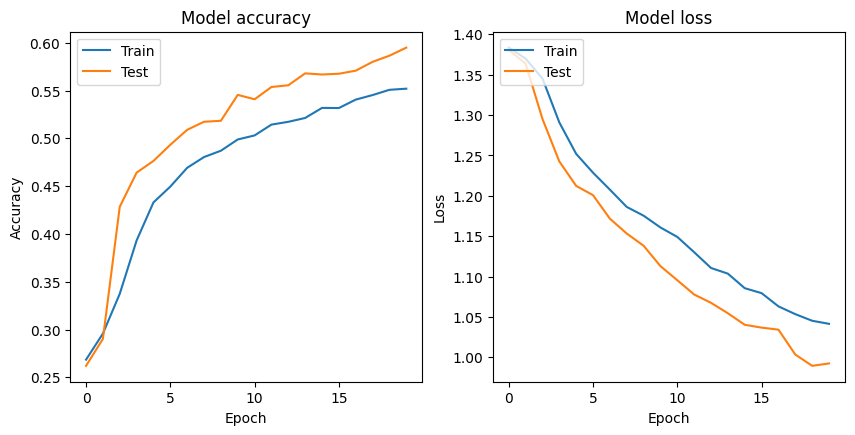

In [ ]:
# prompt: use history_1 to generate side by side plot for accuracy vs val_accuracy and loss vs val_loss

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(2,2,2)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


Found 128 images belonging to 4 classes.
4/4 [==============================] - 0s 5ms/step


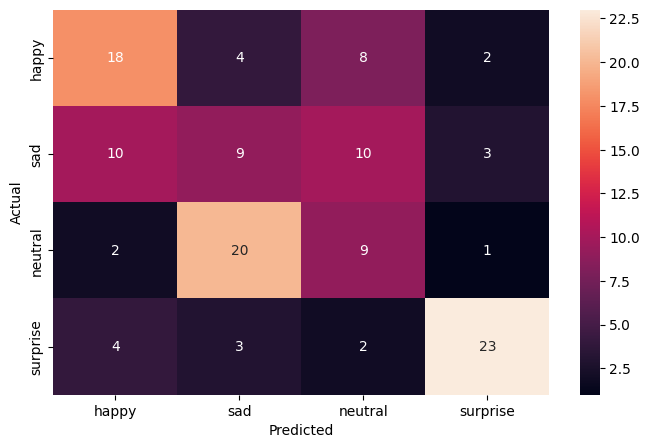

In [ ]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
test_set = datagen_test.flow_from_directory(folder_path + "test",
                                                              target_size = (img_size,img_size),
                                                              color_mode = 'grayscale',
                                                              batch_size = 128,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = True)
test_images, test_labels = next(test_set)

# Write the name of your chosen model in the blank
pred = model_1.predict(test_images)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
#pred_labels = pred.argmax(axis=1)

#print(classification_report(test_labels, pred_labels))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


1/1 [==============================] - 0s 25ms/step


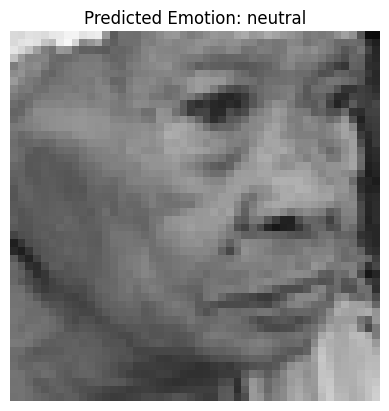

In [ ]:
# Path to the test folder
test_folder = '/content/Facial_emotion_images/test/'

# List all subfolders in the test folder
subfolders = [f.name for f in os.scandir(test_folder) if f.is_dir()]

# Choose a random subfolder
random_subfolder = random.choice(subfolders)
subfolder_path = os.path.join(test_folder, random_subfolder)

# List all files in the chosen subfolder
image_files = os.listdir(subfolder_path)

# Choose a random image from the subfolder
random_image_file = random.choice(image_files)
image_path = os.path.join(subfolder_path, random_image_file)

# Load and preprocess the image
img = load_img(image_path, target_size=(48, 48), grayscale=True)
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the image data to the range [0, 1]

# Make predictions
emotion_labels = ['angry', 'happy', 'neutral', 'sad']  # Replace with your actual emotion labels

predictions = model_1.predict(img_array)
predicted_class = np.argmax(predictions)
predicted_emotion = emotion_labels[predicted_class]

# Display the image
plt.imshow(cv2.imread(image_path))
plt.title(f"Predicted Emotion: {predicted_emotion}")
plt.axis('off')
plt.show()


#**Let's try the same base model in RGB color_mode setting**

In [ ]:
batch_size = 32
img_size = 48
datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale= 1./255,
                                    shear_range= 0.3)
train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size,img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                  brightness_range= (0.,2.),
                                  rescale=1./255,
                                  shear_range= 0.3)

validation_set=datagen_validation.flow_from_directory(folder_path+"validation",
                                    target_size=(img_size,img_size),
                                    color_mode = 'rgb',
                                    batch_size = batch_size,
                                    class_mode = 'categorical',
                                    shuffle = True)

datagen_test = ImageDataGenerator(horizontal_flip = True,
                                  brightness_range=(0.,2.),
                                  rescale = 1./ 255,
                                  shear_range=0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                       target_size = (img_size,img_size),
                                      color_mode= 'rgb',
                                      batch_size=batch_size,
                                      class_mode = 'categorical',
                                            shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [ ]:
# Initializing a Sequential Model
model_2 = Sequential()
# Add the first Convolutional block
model_2.add(Conv2D(64,(2,2), padding = 'same', activation= 'relu', input_shape= (48,48,3)))
model_2.add(MaxPooling2D(2,2))
model_2.add(Dropout(rate=0.2))
# Add the second Convolutional block
model_2.add(Conv2D(32,(2,2), padding = 'same', activation = 'relu'))
model_2.add(MaxPooling2D(2,2))
model_2.add(Dropout(rate = 0.2))
# Add the third Convolutional block
model_2.add(Conv2D(32,(2,2), padding = 'same', activation = 'relu' ))
model_2.add(MaxPooling2D(2,2))
model_2.add(Dropout(rate = 0.2))
# Add the Flatten layer
model_2.add(Flatten())
# Add the first Dense layer
model_2.add(Dense(512, activation = 'relu' ))
model_2.add(Dropout(rate = 0.4))
# Add the Final layer
model_2.add(Dense(4, activation = 'softmax' ))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 64)        832       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 12, 12, 32)       

###**Compiling and Training the RGB Model**

In [ ]:
model_2.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
start_time = datetime.now()
history_2 = model_2.fit(train_set, validation_data = validation_set, epochs=20)
end_time = datetime.now()

elapsed_time = end_time - start_time


Epoch 1/20
473/473 [==============================] - 36s 74ms/step - loss: 1.3862 - accuracy: 0.2720 - val_loss: 1.3754 - val_accuracy: 0.3623
Epoch 2/20
473/473 [==============================] - 34s 72ms/step - loss: 1.3709 - accuracy: 0.3005 - val_loss: 1.3696 - val_accuracy: 0.2942
Epoch 3/20
473/473 [==============================] - 34s 72ms/step - loss: 1.3574 - accuracy: 0.3217 - val_loss: 1.3399 - val_accuracy: 0.3932
Epoch 4/20
473/473 [==============================] - 35s 73ms/step - loss: 1.3133 - accuracy: 0.3743 - val_loss: 1.2738 - val_accuracy: 0.4563
Epoch 5/20
473/473 [==============================] - 35s 74ms/step - loss: 1.2558 - accuracy: 0.4367 - val_loss: 1.2376 - val_accuracy: 0.4603
Epoch 6/20
473/473 [==============================] - 35s 74ms/step - loss: 1.2291 - accuracy: 0.4581 - val_loss: 1.2050 - val_accuracy: 0.4842
Epoch 7/20
473/473 [==============================] - 35s 75ms/step - loss: 1.2054 - accuracy: 0.4737 - val_loss: 1.1701 - val_accuracy:

### **Evaluating the RGB Model on the Test Set**

In [ ]:
# Calculate F1 score, precision, and recall on the test set
y_pred = model_2.predict(test_set)
y_pred_classes = np.argmax(y_pred, axis=-1)
y_true = test_set.classes
f1 = f1_score(y_true, y_pred_classes, average='macro')
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')


results_df2={'Model':'Base_NN_rgb',
       'Loss': history_2.history['loss'][-1],
        'Accuracy': history_2.history['accuracy'][-1],
        'F1_score': f1,
        'Precision': precision,
        'Recall': recall,
        'Time': elapsed_time.total_seconds()}

results_df2 = pd.DataFrame(results_df2, index=[0])

# Print the results
print(results_df2)


4/4 [==============================] - 0s 43ms/step
         Model      Loss  Accuracy  F1_score  Precision    Recall        Time
0  Base_NN_rgb  1.033929  0.555563  0.305918   0.313905  0.304688  682.009627


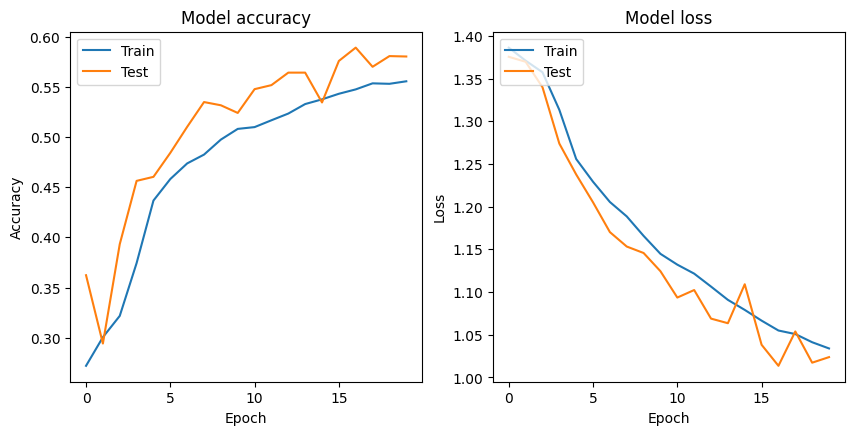

In [ ]:
# prompt: use history_2 to generate side by side plot for accuracy vs val_accuracy and loss vs val_loss

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(2,2,2)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


Found 128 images belonging to 4 classes.
4/4 [==============================] - 0s 6ms/step


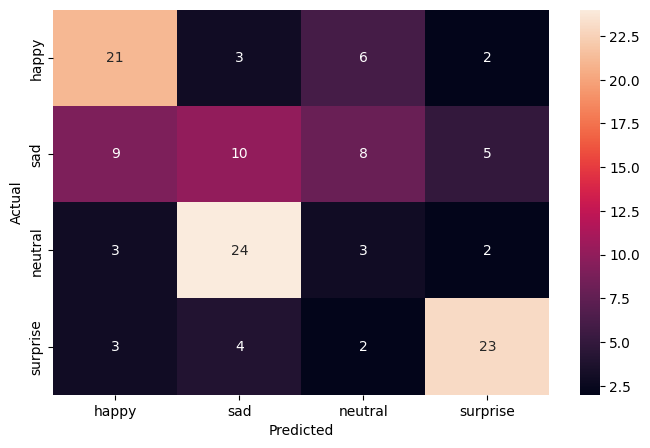

In [ ]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
test_set = datagen_test.flow_from_directory(folder_path + "test",
                                                              target_size = (img_size,img_size),
                                                              color_mode = 'rgb',
                                                              batch_size = 128,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = True)
test_images, test_labels = next(test_set)

# Write the name of your chosen model in the blank
pred = model_2.predict(test_images)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
#pred_labels = pred.argmax(axis=1)

#print(classification_report(test_labels, pred_labels))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

1/1 [==============================] - 0s 85ms/step


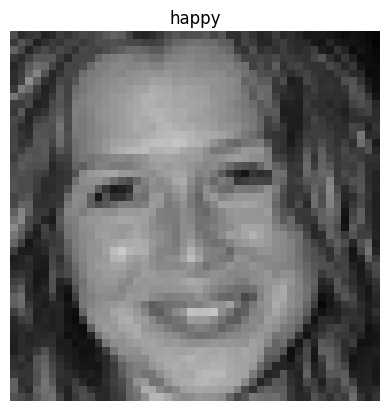

In [ ]:
# prompt: predict an image from /content/Facial_emotion_images/test/sad/ folder
import random
import cv2

# Load your trained CNN multiclass image classification model
model = model_2
# Path to the test folder containing subfolders (one per class)
test_folder = '/content/Facial_emotion_images/test'

# List all subfolders (class labels)
class_labels = os.listdir(test_folder)

# Select a random class (subfolder)
random_class = random.choice(class_labels)

# Path to the selected class folder
class_folder = os.path.join(test_folder, random_class)

# List all image files in the selected class folder
image_files = os.listdir(class_folder)

# Select a random image file
random_image_file = random.choice(image_files)

# Load and preprocess the selected image
image_path = os.path.join(class_folder, random_image_file)
img = cv2.imread(image_path)# Load the image in grayscale
img = cv2.resize(img, (48, 48))  # Resize the image to 48x48 pixels
img = img / 255.0  # Normalize the pixel values to be in the range [0, 1]
img = np.expand_dims(img, axis=0)  # Add a batch dimension

# Make predictions on the preprocessed image
predictions = model.predict(img)

# Get the predicted class (index)
predicted_class = np.argmax(predictions)

# Get the corresponding class label (subfolder name)
predicted_label = random_class

# Display the image with the predicted label
plt.imshow(img.squeeze(), cmap='gray')  # Show the grayscale image
plt.title(predicted_label)
plt.axis('off')
plt.show()


**Observations and Insights:**
Results are subpar with 55% training accuracy and 59% test accuracy for the grayscale model. Training and validation accuracy are following similar trend. The difference between the two are 4%.<br> We also tried the same model with rgb image color setting. The model yielded a slightly better results with 56% training accuracy and 58% validation accuracy with a difference of 2% similar to grayscale image model. Neither of the models were overfitting.

### **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture <br> We added fourth convolutional block and an additional dense layer with higher neurons.

In [ ]:
# Initializing a Sequential Model
model_modified = Sequential()

# Add the first Convolutional block
model_modified.add(Conv2D(128, (2, 2), padding='same', activation='relu', input_shape=(48, 48, 3)))
model_modified.add(MaxPooling2D(2, 2))
model_modified.add(Dropout(rate=0.2))

# Add the second Convolutional block
model_modified.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
model_modified.add(MaxPooling2D(2, 2))
model_modified.add(Dropout(rate=0.2))

# Add the third Convolutional block
model_modified.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model_modified.add(MaxPooling2D(2, 2))
model_modified.add(Dropout(rate=0.2))

# Add the fourth Convolutional block (new)
model_modified.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
model_modified.add(MaxPooling2D(2, 2))
model_modified.add(Dropout(rate=0.2))

# Add the Flatten layer
model_modified.add(Flatten())

# Add the first Dense layer with higher neurons
model_modified.add(Dense(512, activation='relu'))  # Increased from 512 to 1024 neurons
model_modified.add(Dropout(rate=0.4))

# Add the additional Dense layer
model_modified.add(Dense(1024, activation='relu'))

# Add the Final layer
model_modified.add(Dense(4, activation='softmax'))

model_modified.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 128)       1664      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 24, 24, 128)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        32832     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 12, 12, 64)       

### **Compiling and Training the Modified Model**

In [ ]:
model_modified.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
start_time = datetime.now()
history_3 = model_modified.fit(train_set, validation_data = validation_set, epochs=20)
end_time = datetime.now()

elapsed_time = end_time - start_time

Epoch 1/20
473/473 [==============================] - 52s 105ms/step - loss: 1.3834 - accuracy: 0.2690 - val_loss: 1.3764 - val_accuracy: 0.2429
Epoch 2/20
473/473 [==============================] - 47s 99ms/step - loss: 1.3787 - accuracy: 0.2708 - val_loss: 1.3696 - val_accuracy: 0.2729
Epoch 3/20
473/473 [==============================] - 47s 99ms/step - loss: 1.3740 - accuracy: 0.2863 - val_loss: 1.3596 - val_accuracy: 0.3219
Epoch 4/20
473/473 [==============================] - 47s 99ms/step - loss: 1.3683 - accuracy: 0.3009 - val_loss: 1.3554 - val_accuracy: 0.3339
Epoch 5/20
473/473 [==============================] - 46s 97ms/step - loss: 1.3567 - accuracy: 0.3217 - val_loss: 1.3326 - val_accuracy: 0.3856
Epoch 6/20
473/473 [==============================] - 47s 98ms/step - loss: 1.3325 - accuracy: 0.3487 - val_loss: 1.2904 - val_accuracy: 0.4063
Epoch 7/20
473/473 [==============================] - 48s 101ms/step - loss: 1.2943 - accuracy: 0.3915 - val_loss: 1.2477 - val_accurac

### **Evaluating the Modified Model on the Test Set**

In [ ]:
# Calculate F1 score, precision, and recall on the test set
y_pred = model_modified.predict(test_set)
y_pred_classes = np.argmax(y_pred, axis=-1)
y_true = test_set.classes
f1 = f1_score(y_true, y_pred_classes, average='macro')
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')


results_df3={'Model':'Modified_Base_rgb',
       'Loss': history_3.history['loss'][-1],
        'Accuracy': history_3.history['accuracy'][-1],
        'F1_score': f1,
        'Precision': precision,
        'Recall': recall,
        'Time': elapsed_time.total_seconds()}

results_df3 = pd.DataFrame(results_df3, index=[0])

# Print the results
print(results_df3)


1/1 [==============================] - 0s 261ms/step
               Model      Loss  Accuracy  F1_score  Precision    Recall  \
0  Modified_Base_rgb  1.051144  0.537693  0.229002   0.231184  0.234375   

          Time  
0  1061.241112  


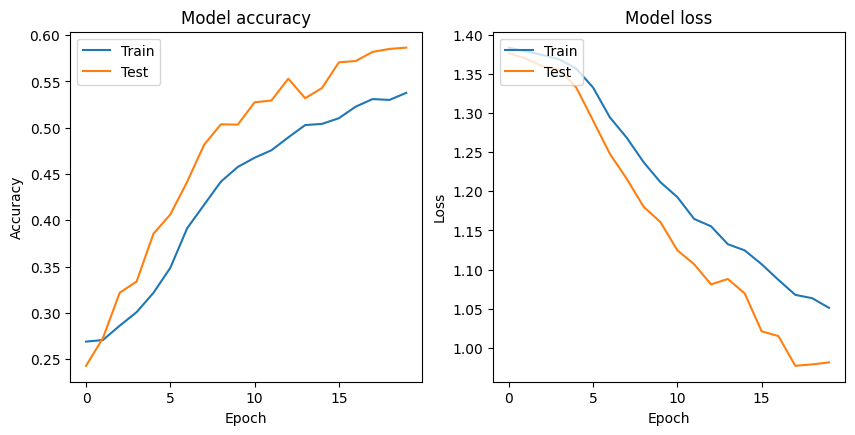

In [ ]:
# prompt: use history_3 to generate side by side plot for accuracy vs val_accuracy and loss vs val_loss

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(2,2,2)
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


Found 128 images belonging to 4 classes.
4/4 [==============================] - 0s 12ms/step


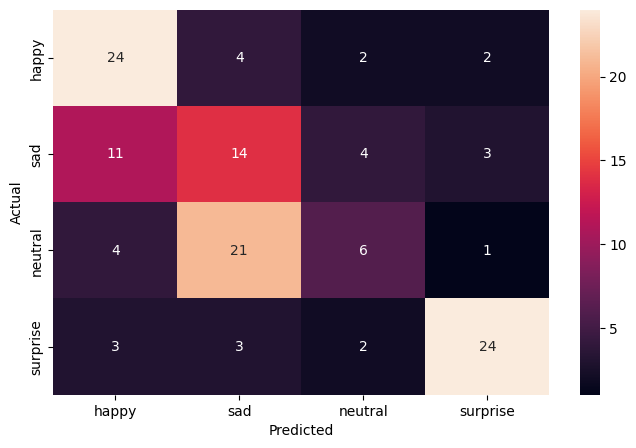

In [ ]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
test_set = datagen_test.flow_from_directory(folder_path + "test",
                                                              target_size = (img_size,img_size),
                                                              color_mode = 'rgb',
                                                              batch_size = 128,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = True)
test_images, test_labels = next(test_set)

# Write the name of your chosen model in the blank
pred = model_modified.predict(test_images)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
#pred_labels = pred.argmax(axis=1)

#print(classification_report(test_labels, pred_labels))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


1/1 [==============================] - 0s 99ms/step


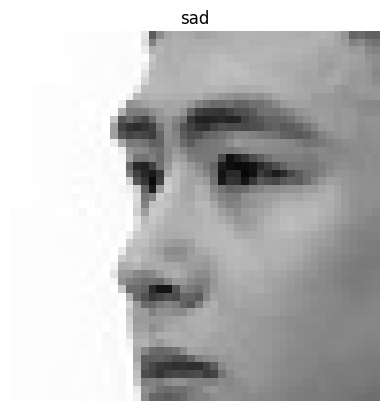

In [ ]:
# prompt: predict an image from /content/Facial_emotion_images/test/sad/ folder
import random
import cv2

# Load your trained CNN multiclass image classification model
model = model_modified
# Load the test set

# Path to the test folder containing subfolders (one per class)
test_folder = '/content/Facial_emotion_images/test'

# List all subfolders (class labels)
class_labels = os.listdir(test_folder)

# Select a random class (subfolder)
random_class = random.choice(class_labels)

# Path to the selected class folder
class_folder = os.path.join(test_folder, random_class)

# List all image files in the selected class folder
image_files = os.listdir(class_folder)

# Select a random image file
random_image_file = random.choice(image_files)

# Load and preprocess the selected image
image_path = os.path.join(class_folder, random_image_file)
img = cv2.imread(image_path)# Load the image in grayscale
img = cv2.resize(img, (48, 48))  # Resize the image to 48x48 pixels
img = img / 255.0  # Normalize the pixel values to be in the range [0, 1]
img = np.expand_dims(img, axis=0)  # Add a batch dimension

# Make predictions on the preprocessed image
predictions = model.predict(img)

# Get the predicted class (index)
predicted_class = np.argmax(predictions)

# Get the corresponding class label (subfolder name)
predicted_label = random_class

# Display the image with the predicted label
plt.imshow(img.squeeze(), cmap='gray')  # Show the grayscale image
plt.title(predicted_label)
plt.axis('off')
plt.show()


## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

**Observations and Insights:**
This model performed similar to the last models, and as the training data improved the model did not improve besides running smoother.
The models ran longer with a small number of dataset.
The difference in the color setting was negligable

We can further try various hyperparameter tuning techniques:
• Dropouts
• Learning rate

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [ ]:
# Load the VGG16 model without the top classification layers
model_vgg16= tf.keras.applications.VGG16(input_shape=(48, 48, 3), include_top=False, weights= 'imagenet')

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Freeze the layers of the VGG16 model
for layer in model_vgg16.layers:
    layer.trainable = False

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Create a custom model for classification
model_4 = Sequential()
model_4.add(model_vgg16)
model_4.add(Flatten())
model_4.add(BatchNormalization())
model_4.add(Dense(256, activation='relu'))
#model_4.add(Dropout(0.1))
model_4.add(Dense(512, activation='relu'))
model_4.add(Dense(4, activation='softmax'))  # 4 output classes

In [ ]:
# Model Summary

model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 512)               131584    
                                                                 
 dense_9 (Dense)             (None, 4)                 2052      
                                                      

### **Compiling and Training the VGG16 Model**

In [ ]:
model_4.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
start_time = datetime.now()
history_4 = model_4.fit(train_set, validation_data = validation_set, epochs=20, batch_size=128)
end_time = datetime.now()

elapsed_time = end_time - start_time

Epoch 1/20
473/473 [==============================] - 64s 131ms/step - loss: 1.2542 - accuracy: 0.4169 - val_loss: 1.2093 - val_accuracy: 0.4432
Epoch 2/20
473/473 [==============================] - 53s 112ms/step - loss: 1.1806 - accuracy: 0.4663 - val_loss: 1.1765 - val_accuracy: 0.4766
Epoch 3/20
473/473 [==============================] - 53s 112ms/step - loss: 1.1490 - accuracy: 0.4857 - val_loss: 1.1398 - val_accuracy: 0.4921
Epoch 4/20
473/473 [==============================] - 52s 111ms/step - loss: 1.1394 - accuracy: 0.4915 - val_loss: 1.1443 - val_accuracy: 0.4977
Epoch 5/20
473/473 [==============================] - 52s 110ms/step - loss: 1.1237 - accuracy: 0.4990 - val_loss: 1.1467 - val_accuracy: 0.4941
Epoch 6/20
473/473 [==============================] - 52s 110ms/step - loss: 1.1068 - accuracy: 0.5075 - val_loss: 1.1324 - val_accuracy: 0.4949
Epoch 7/20
473/473 [==============================] - 52s 110ms/step - loss: 1.1041 - accuracy: 0.5100 - val_loss: 1.1581 - val_ac

### **Evaluating the VGG16 model**

In [ ]:
# Calculate F1 score, precision, and recall on the test set
y_pred = model_4.predict(test_set)
y_pred_classes = np.argmax(y_pred, axis=-1)
y_true = test_set.classes
f1 = f1_score(y_true, y_pred_classes, average='macro')
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')


results_df4={'Model':'VGG16_rgb',
       'Loss': history_4.history['loss'][-1],
        'Accuracy': history_4.history['accuracy'][-1],
        'F1_score': f1,
        'Precision': precision,
        'Recall': recall,
        'Time': elapsed_time.total_seconds()}

results_df4 = pd.DataFrame(results_df4, index=[0])


        # Append the results to the DataFrame
#results_df = results_df.append(result, ignore_index=True)

# Print the results
print(results_df4)


1/1 [==============================] - 1s 636ms/step
       Model      Loss  Accuracy  F1_score  Precision    Recall         Time
0  VGG16_rgb  1.024084  0.553908  0.272907   0.273025  0.273438  1061.241112


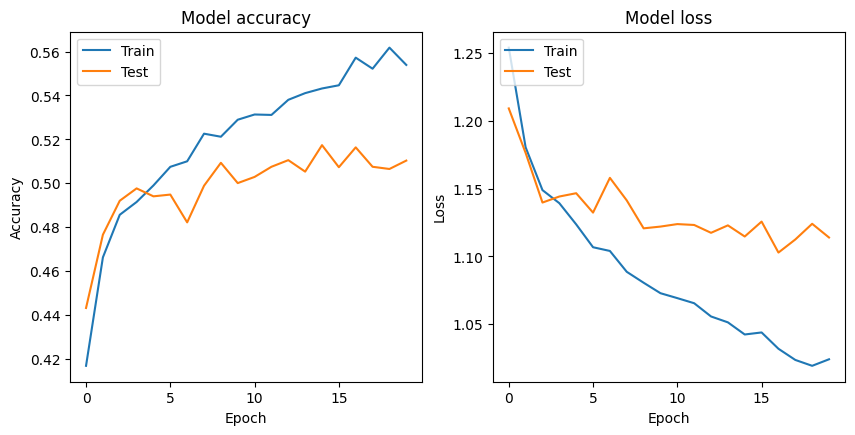

In [ ]:
# prompt: use history_3 to generate side by side plot for accuracy vs val_accuracy and loss vs val_loss

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(2,2,2)
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


Found 128 images belonging to 4 classes.
4/4 [==============================] - 0s 71ms/step


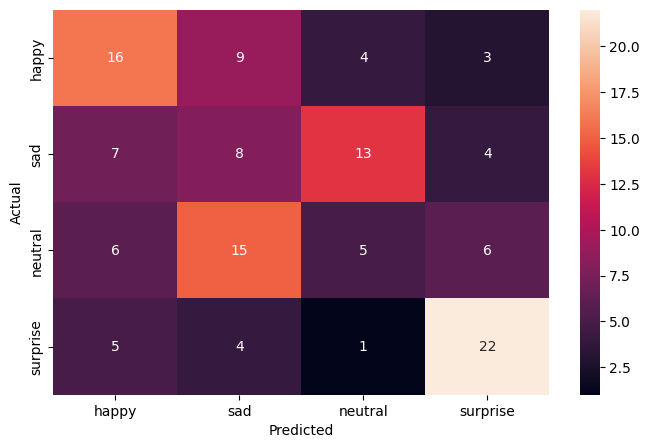

In [ ]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
test_set = datagen_test.flow_from_directory(folder_path + "test",
                                                              target_size = (img_size,img_size),
                                                              color_mode = 'rgb',
                                                              batch_size = 128,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = True)
test_images, test_labels = next(test_set)

# Write the name of your chosen model in the blank
pred = model_4.predict(test_images)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

1/1 [==============================] - 0s 226ms/step


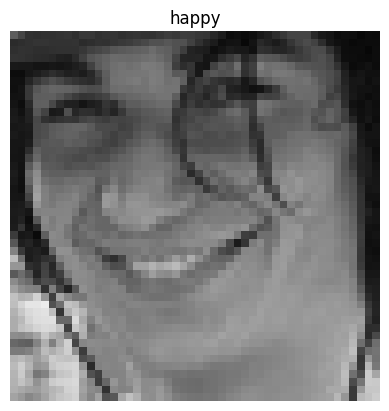

In [ ]:
# prompt: predict an image from /content/Facial_emotion_images/test/sad/ folder
import random
import cv2

# Load your trained CNN multiclass image classification model
model = model_4

# Load the test set

# Path to the test folder containing subfolders (one per class)
test_folder = '/content/Facial_emotion_images/test'

# List all subfolders (class labels)
class_labels = os.listdir(test_folder)

# Select a random class (subfolder)
random_class = random.choice(class_labels)

# Path to the selected class folder
class_folder = os.path.join(test_folder, random_class)

# List all image files in the selected class folder
image_files = os.listdir(class_folder)

# Select a random image file
random_image_file = random.choice(image_files)

# Load and preprocess the selected image
image_path = os.path.join(class_folder, random_image_file)
img = cv2.imread(image_path)# Load the image in grayscale
img = cv2.resize(img, (48, 48))  # Resize the image to 48x48 pixels
img = img / 255.0  # Normalize the pixel values to be in the range [0, 1]
img = np.expand_dims(img, axis=0)  # Add a batch dimension

# Make predictions on the preprocessed image
predictions = model.predict(img)

# Get the predicted class (index)
predicted_class = np.argmax(predictions)

# Get the corresponding class label (subfolder name)
predicted_label = random_class

# Display the image with the predicted label
plt.imshow(img.squeeze(), cmap='gray')  # Show the grayscale image
plt.title(predicted_label)
plt.axis('off')
plt.show()


**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Observations and Insights:**
The VGG model did not perform with better results. As the training accuracy(55%) increased the validation (51%) declined. The model started overfitting. The training accuracy consistently improved and started overfitting.

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet50 Model**

In [ ]:
# Load the ResNetV2 model without the top classification layers
model_ResNet = ResNet50(input_shape=(48,48,3),include_top = False, weights = 'imagenet')

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
# Freezing layers
for layer in model_ResNet.layers:
    layer.trainable = False

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Build model on the top of base model
#add fully connected layers
model_5 = Sequential()
model_5.add(model_ResNet)
model_5.add(Flatten())
model_5.add(BatchNormalization())
model_5.add(Dense(256, activation='relu'))
#model_5.add(Dropout(0.1))
model_5.add(Dense(512, activation='relu'))
model_5.add(Dense(4, activation='softmax'))  # 4 output classes

In [ ]:
# Model Summary

model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 8192)             32768     
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 256)               2097408   
                                                                 
 dense_11 (Dense)            (None, 512)               131584    
                                                                 
 dense_12 (Dense)            (None, 4)                 2052      
                                                      

### **Compiling and Training the Model**

In [ ]:
model_5.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
start_time = datetime.now()
history_5 = model_5.fit(train_set, validation_data = validation_set, epochs=20, batch_size=128)
end_time = datetime.now()

elapsed_time = end_time - start_time

Epoch 1/20
473/473 [==============================] - 67s 131ms/step - loss: 1.2852 - accuracy: 0.3796 - val_loss: 1.2393 - val_accuracy: 0.4051
Epoch 2/20
473/473 [==============================] - 61s 129ms/step - loss: 1.2159 - accuracy: 0.4398 - val_loss: 1.2005 - val_accuracy: 0.4410
Epoch 3/20
473/473 [==============================] - 59s 125ms/step - loss: 1.1862 - accuracy: 0.4567 - val_loss: 1.1726 - val_accuracy: 0.4766
Epoch 4/20
473/473 [==============================] - 59s 125ms/step - loss: 1.1686 - accuracy: 0.4692 - val_loss: 1.1664 - val_accuracy: 0.4720
Epoch 5/20
473/473 [==============================] - 60s 127ms/step - loss: 1.1512 - accuracy: 0.4808 - val_loss: 1.1478 - val_accuracy: 0.4915
Epoch 6/20
473/473 [==============================] - 59s 125ms/step - loss: 1.1330 - accuracy: 0.4894 - val_loss: 1.1602 - val_accuracy: 0.4760
Epoch 7/20
473/473 [==============================] - 60s 127ms/step - loss: 1.1250 - accuracy: 0.4971 - val_loss: 1.1449 - val_ac

### **Evaluating the ResNet Model**

In [ ]:
# Calculate F1 score, precision, and recall on the test set
y_pred = model_5.predict(test_set)
y_pred_classes = np.argmax(y_pred, axis=-1)
y_true = test_set.classes
f1 = f1_score(y_true, y_pred_classes, average='macro')
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')


results_df5={'Model':'ResNetV2_rgb',
       'Loss': history_5.history['loss'][-1],
        'Accuracy': history_5.history['accuracy'][-1],
        'F1_score': f1,
        'Precision': precision,
        'Recall': recall,
        'Time': elapsed_time.total_seconds()}

results_df5 = pd.DataFrame(results_df5, index=[0])


        # Append the results to the DataFrame
#results_df = results_df.append(result, ignore_index=True)

# Print the results
print(results_df5)


1/1 [==============================] - 1s 1s/step
          Model      Loss  Accuracy  F1_score  Precision   Recall         Time
0  ResNetV2_rgb  1.038818   0.54312  0.280479   0.280556  0.28125  1199.008536


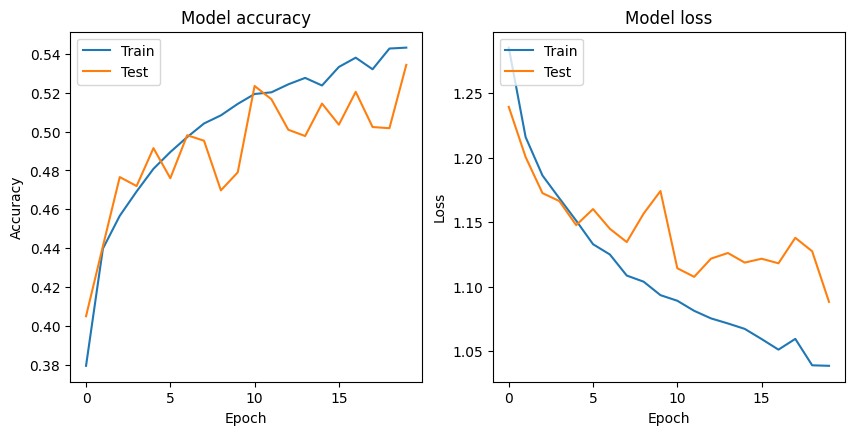

In [ ]:
# prompt: use history_3 to generate side by side plot for accuracy vs val_accuracy and loss vs val_loss

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(2,2,2)
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


Found 128 images belonging to 4 classes.
4/4 [==============================] - 1s 90ms/step


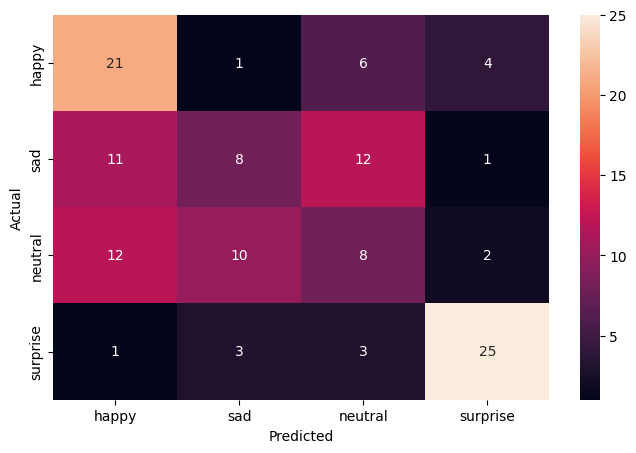

In [ ]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
test_set = datagen_test.flow_from_directory(folder_path + "test",
                                                              target_size = (img_size,img_size),
                                                              color_mode = 'rgb',
                                                              batch_size = 128,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = True)
test_images, test_labels = next(test_set)

# Write the name of your chosen model in the blank
pred = model_5.predict(test_images)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

1/1 [==============================] - 1s 1s/step


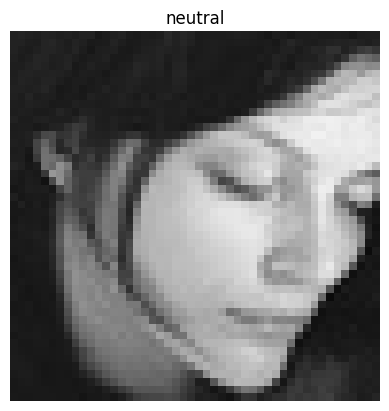

In [ ]:
# prompt: predict an image from /content/Facial_emotion_images/test/sad/ folder
import random
import cv2

# Load your trained CNN multiclass image classification model
model = model_5

# Load the test set

# Path to the test folder containing subfolders (one per class)
test_folder = '/content/Facial_emotion_images/test'

# List all subfolders (class labels)
class_labels = os.listdir(test_folder)

# Select a random class (subfolder)
random_class = random.choice(class_labels)

# Path to the selected class folder
class_folder = os.path.join(test_folder, random_class)

# List all image files in the selected class folder
image_files = os.listdir(class_folder)

# Select a random image file
random_image_file = random.choice(image_files)

# Load and preprocess the selected image
image_path = os.path.join(class_folder, random_image_file)
img = cv2.imread(image_path)# Load the image in grayscale
img = cv2.resize(img, (48, 48))  # Resize the image to 48x48 pixels
img = img / 255.0  # Normalize the pixel values to be in the range [0, 1]
img = np.expand_dims(img, axis=0)  # Add a batch dimension

# Make predictions on the preprocessed image
predictions = model.predict(img)

# Get the predicted class (index)
predicted_class = np.argmax(predictions)

# Get the corresponding class label (subfolder name)
predicted_label = random_class

# Display the image with the predicted label
plt.imshow(img.squeeze(), cmap='gray')  # Show the grayscale image
plt.title(predicted_label)
plt.axis('off')
plt.show()


**Observations and Insights:**
The ResNet model performed slightly worse than the VGG model. The validation accuracy was unstable as the model was tryinng to prevent overfitting. We notice the training accuracy (54%) increase and the validation accuracy (53%) is following the trend. They are 1% apart. This model also started overfitting. We believe increasing the depth of the model and further hyper parameter tuning can improve its performance.

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet B1 Model**

In [ ]:
# Load the EfficientNet Model
model_EffNet = EfficientNetB1(input_shape=(48,48,3),include_top=False,weights='imagenet')

In [ ]:
# Freezing Layers

for layer in model_EffNet.layers[:-4]:
    layer.trainable=False

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Build model on the top of base model
#add fully connected layers
model_6=Sequential()
model_6.add(model_EffNet)
model_6.add(Dropout(0.5))
model_6.add(Flatten())
model_6.add(BatchNormalization())
model_6.add(Dense(32,kernel_initializer='he_uniform'))
model_6.add(BatchNormalization())
model_6.add(Activation('relu'))
model_6.add(Dropout(0.5))
model_6.add(Dense(32,kernel_initializer='he_uniform'))
model_6.add(BatchNormalization())
model_6.add(Activation('relu'))
model_6.add(Dropout(0.5))
model_6.add(Dense(32,kernel_initializer='he_uniform'))
model_6.add(BatchNormalization())
model_6.add(Activation('relu'))
model_6.add(Dense(4,activation='softmax'))

In [ ]:
# Model Summary

model_6.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb1 (Functional)  (None, 2, 2, 1280)       6575239   
                                                                 
 dropout_21 (Dropout)        (None, 2, 2, 1280)        0         
                                                                 
 flatten_16 (Flatten)        (None, 5120)              0         
                                                                 
 batch_normalization_10 (Bat  (None, 5120)             20480     
 chNormalization)                                                
                                                                 
 dense_43 (Dense)            (None, 32)                163872    
                                                                 
 batch_normalization_11 (Bat  (None, 32)               128       
 chNormalization)                                    

### **Compiling and Training the Model**

In [ ]:
model_6.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
start_time = datetime.now()
history_6 = model_6.fit(train_set, validation_data = validation_set, epochs=20, batch_size=64)
end_time = datetime.now()

elapsed_time = end_time - start_time

Epoch 1/20
473/473 [==============================] - 84s 143ms/step - loss: 1.5625 - accuracy: 0.2454 - val_loss: 1.3975 - val_accuracy: 0.1601
Epoch 2/20
473/473 [==============================] - 64s 136ms/step - loss: 1.5040 - accuracy: 0.2558 - val_loss: 1.3862 - val_accuracy: 0.2214
Epoch 3/20
473/473 [==============================] - 64s 134ms/step - loss: 1.4754 - accuracy: 0.2527 - val_loss: 1.3863 - val_accuracy: 0.2301
Epoch 4/20
473/473 [==============================] - 65s 137ms/step - loss: 1.4563 - accuracy: 0.2643 - val_loss: 1.3808 - val_accuracy: 0.2391
Epoch 5/20
473/473 [==============================] - 65s 138ms/step - loss: 1.4413 - accuracy: 0.2602 - val_loss: 1.3772 - val_accuracy: 0.2648
Epoch 6/20
473/473 [==============================] - 64s 135ms/step - loss: 1.4350 - accuracy: 0.2574 - val_loss: 1.3763 - val_accuracy: 0.2276
Epoch 7/20
473/473 [==============================] - 64s 134ms/step - loss: 1.4289 - accuracy: 0.2532 - val_loss: 1.3781 - val_ac

### **Evaluating the EfficientnetNet Model**

In [ ]:
# Calculate F1 score, precision, and recall on the test set
y_pred = model_6.predict(test_set)
y_pred_classes = np.argmax(y_pred, axis=-1)
y_true = test_set.classes
f1 = f1_score(y_true, y_pred_classes, average='macro')
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')


results_df6={'Model':'EfficientnetNet_rgb',
       'Loss': history_6.history['loss'][-1],
        'Accuracy': history_6.history['accuracy'][-1],
        'F1_score': f1,
        'Precision': precision,
        'Recall': recall,
        'Time': elapsed_time.total_seconds()}

results_df6 = pd.DataFrame(results_df6, index=[0])


        # Append the results to the DataFrame
#results_df = results_df.append(result, ignore_index=True)

# Print the results
print(results_df6)


1/1 [==============================] - 3s 3s/step
                 Model      Loss  Accuracy  F1_score  Precision    Recall  \
0  EfficientnetNet_rgb  1.396578  0.262691  0.147773   0.144355  0.210938   

          Time  
0  1294.746427  


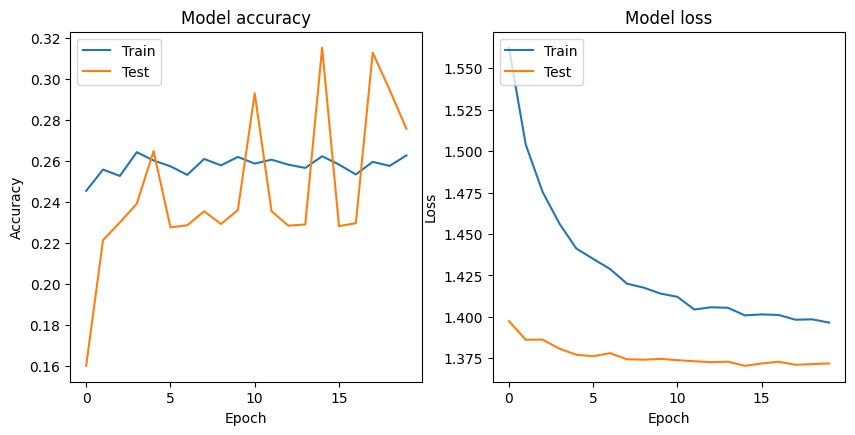

In [ ]:
# prompt: use history_3 to generate side by side plot for accuracy vs val_accuracy and loss vs val_loss

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(history_6.history['accuracy'])
plt.plot(history_6.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(2,2,2)
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


Found 128 images belonging to 4 classes.
4/4 [==============================] - 3s 88ms/step


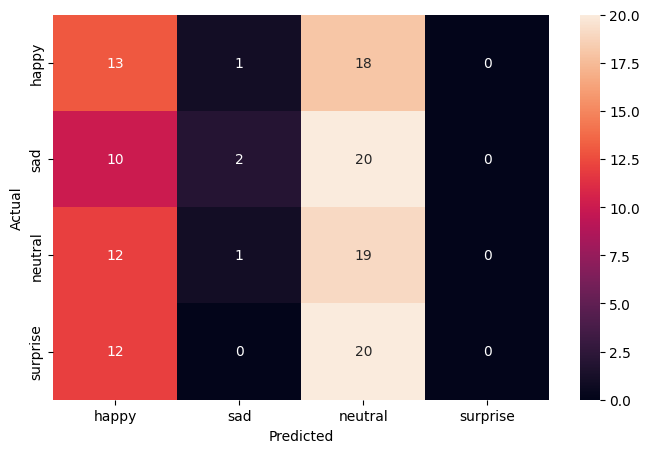

In [ ]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
test_set = datagen_test.flow_from_directory(folder_path + "test",
                                                              target_size = (img_size,img_size),
                                                              color_mode = 'rgb',
                                                              batch_size = 128,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = True)
test_images, test_labels = next(test_set)

# Write the name of your chosen model in the blank
pred = model_6.predict(test_images)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

1/1 [==============================] - 3s 3s/step


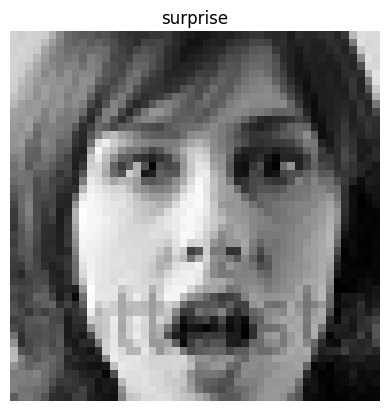

In [ ]:
# prompt: predict an image from /content/Facial_emotion_images/test/sad/ folder
import random
import cv2

# Load your trained CNN multiclass image classification model
model = model_6

# Load the test set

# Path to the test folder containing subfolders (one per class)
test_folder = '/content/Facial_emotion_images/test'

# List all subfolders (class labels)
class_labels = os.listdir(test_folder)

# Select a random class (subfolder)
random_class = random.choice(class_labels)

# Path to the selected class folder
class_folder = os.path.join(test_folder, random_class)

# List all image files in the selected class folder
image_files = os.listdir(class_folder)

# Select a random image file
random_image_file = random.choice(image_files)

# Load and preprocess the selected image
image_path = os.path.join(class_folder, random_image_file)
img = cv2.imread(image_path)# Load the image in grayscale
img = cv2.resize(img, (48, 48))  # Resize the image to 48x48 pixels
img = img / 255.0  # Normalize the pixel values to be in the range [0, 1]
img = np.expand_dims(img, axis=0)  # Add a batch dimension

# Make predictions on the preprocessed image
predictions = model.predict(img)

# Get the predicted class (index)
predicted_class = np.argmax(predictions)

# Get the corresponding class label (subfolder name)
predicted_label = random_class

# Display the image with the predicted label
plt.imshow(img.squeeze(), cmap='gray')  # Show the grayscale image
plt.title(predicted_label)
plt.axis('off')
plt.show()


**Observations and Insights:**
The EfficientNet model performed poorer than the ResNet model. The validation accuracy was unstable as the model was tryinng to prevent overfitting. We notice the training accuracy decline (26%) and the validation accuracy improve (27%) following the trend. They are 1% apart similar to the ResNet model. Thsi model is also overfitting.

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?<br>
-- It appears the transfer learning architechtures need to to be evaluated with deeper architechture with hyper parameter tuning. The accuracies are not acceptable and requires further improvement. The model has very high number of training parameters and needs to be run at a lower learning rate and higher epoch for better evaluation.
* Do you think our issue lies with 'rgb' color_mode?
-- The issue may lie with the fact that the transfer learning architechtures were trained with color images and we are masking our grayscale images with a rgb filter. However, the fact that validation is unstable at a higher learning rate indicates we need to slowdown its learning.

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [ ]:
batch_size = 32
img_size = 48
datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale= 1./255,
                                    shear_range= 0.3)
train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size,img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                  brightness_range= (0.,2.),
                                  rescale=1./255,
                                  shear_range= 0.3)

validation_set=datagen_validation.flow_from_directory(folder_path+"validation",
                                    target_size=(img_size,img_size),
                                    color_mode = 'grayscale',
                                    batch_size = batch_size,
                                    class_mode = 'categorical',
                                    shuffle = True)

datagen_test = ImageDataGenerator(horizontal_flip = True,
                                  brightness_range=(0.,2.),
                                  rescale = 1./ 255,
                                  shear_range=0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                       target_size = (img_size,img_size),
                                      color_mode= 'grayscale',
                                      batch_size=batch_size,
                                      class_mode = 'categorical',
                                            shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.
### **Model Building**

* In this network, we plan to have 5 Convolutional Blocks
* Add first Conv2D layer with **64 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input shape = (48, 48, 1)**. Use **'relu' activation**.
* Add your BatchNormalization layer followed by a LeakyRelU layer with Leaky ReLU parameter of **0.1**
* Add MaxPooling2D layer with **pool size = 2**.
* Add a Dropout layer with a Dropout Ratio of **0.2**. This completes the first Convolutional block.
* Add a second Conv2D layer with **128 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar BatchNormalization, LeakyRelU, Maxpooling2D, and Dropout layer like above to complete your second Convolutional Block.
* Add a third Conv2D layer with **512 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a BatchNormalization, LeakyRelU, Maxpooling2D, and Dropout layer to complete your third Convolutional block.
* Add a fourth block, with the Conv2D layer having **512 filters**.
* Add the fifth block, having **128 filters**.
* Then add your Flatten layer, followed by your Dense layers.
* Add your first Dense layer with **256 neurons** followed by a BatchNormalization layer, a **'relu'** Activation, and a Dropout layer. This forms your first Fully Connected block
* Add your second Dense layer with **512 neurons**, again followed by a BatchNormalization layer, **relu** activation, and a Dropout layer.
* Add your final Dense layer with 4 neurons.
* Compile your model with the optimizer of your choice.

In [ ]:
no_of_classes = 4

# Create a Sequential model
model_7 = Sequential()

# First Convolutional Block
model_7.add(Conv2D(64, kernel_size=2, padding='same', input_shape=(48, 48, 1)))
model_7.add(BatchNormalization())
model_7.add(LeakyReLU(0.1))
model_7.add(MaxPooling2D(pool_size=2))
model_7.add(Dropout(0.2))

# Second Convolutional Block
model_7.add(Conv2D(128, kernel_size=2, padding='same'))
model_7.add(BatchNormalization())
model_7.add(LeakyReLU(0.1))
model_7.add(MaxPooling2D(pool_size=2))
model_7.add(Dropout(0.2))

# Third Convolutional Block
model_7.add(Conv2D(512, kernel_size=2, padding='same'))
model_7.add(BatchNormalization())
model_7.add(LeakyReLU(0.1))
model_7.add(MaxPooling2D(pool_size=2))
model_7.add(Dropout(0.2))

# Fourth Convolutional Block
model_7.add(Conv2D(512, kernel_size=2, padding='same'))
model_7.add(BatchNormalization())
model_7.add(LeakyReLU(0.1))
model_7.add(MaxPooling2D(pool_size=2))
model_7.add(Dropout(0.2))

# Fifth Convolutional Block
model_7.add(Conv2D(128, kernel_size=2, padding='same'))
model_7.add(BatchNormalization())
model_7.add(LeakyReLU(0.1))
model_7.add(MaxPooling2D(pool_size=2))
model_7.add(Dropout(0.2))

# Flatten layer
model_7.add(Flatten())

# First Fully Connected Block
model_7.add(Dense(256))
model_7.add(BatchNormalization())
model_7.add(LeakyReLU(0.1))
model_7.add(Dropout(0.2))

# Second Fully Connected Block
model_7.add(Dense(512))
model_7.add(BatchNormalization())
model_7.add(LeakyReLU(0.1))
model_7.add(Dropout(0.2))

# Final Dense layer
model_7.add(Dense(4, activation='softmax'))

In [ ]:
# Print model summary to check the architecture
model_7.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 48, 48, 64)        320       
                                                                 
 batch_normalization_21 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_31 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 128)     

### **Compiling and Training the Model**

In [ ]:
start_time = datetime.now()
model_7.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics=['accuracy'])
end_time = datetime.now()

elapsed_time = end_time - start_time

In [ ]:
history_7=model_7.fit(train_set,validation_data=validation_set,epochs = 20)

Epoch 1/20
473/473 [==============================] - 59s 117ms/step - loss: 1.5187 - accuracy: 0.2733 - val_loss: 1.3597 - val_accuracy: 0.3130
Epoch 2/20
473/473 [==============================] - 55s 117ms/step - loss: 1.2963 - accuracy: 0.3905 - val_loss: 1.0966 - val_accuracy: 0.5039
Epoch 3/20
473/473 [==============================] - 54s 115ms/step - loss: 1.1137 - accuracy: 0.4989 - val_loss: 0.9892 - val_accuracy: 0.5608
Epoch 4/20
473/473 [==============================] - 55s 115ms/step - loss: 1.0178 - accuracy: 0.5620 - val_loss: 0.9207 - val_accuracy: 0.6124
Epoch 5/20
473/473 [==============================] - 54s 115ms/step - loss: 0.9498 - accuracy: 0.5889 - val_loss: 0.9718 - val_accuracy: 0.6080
Epoch 6/20
473/473 [==============================] - 54s 114ms/step - loss: 0.9059 - accuracy: 0.6152 - val_loss: 0.8438 - val_accuracy: 0.6420
Epoch 7/20
473/473 [==============================] - 55s 117ms/step - loss: 0.8754 - accuracy: 0.6279 - val_loss: 0.7947 - val_ac

### **Evaluating the Model on Test Set**

In [ ]:
# Calculate F1 score, precision, and recall on the test set
y_pred = model_7.predict(test_set)
y_pred_classes = np.argmax(y_pred, axis=-1)
y_true = test_set.classes
f1 = f1_score(y_true, y_pred_classes, average='macro')
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')


results_df7={'Model':'Complex_5layerCNN_Grayscale',
       'Loss': history_7.history['loss'][-1],
        'Accuracy': history_7.history['accuracy'][-1],
        'F1_score': f1,
        'Precision': precision,
        'Recall': recall,
        'Time': elapsed_time.total_seconds()}

results_df7 = pd.DataFrame(results_df7, index=[0])


        # Append the results to the DataFrame
#results_df = results_df.append(result, ignore_index=True)

# Print the results
print(results_df7)


4/4 [==============================] - 0s 38ms/step
                         Model      Loss  Accuracy  F1_score  Precision  \
0  Complex_5layerCNN_Grayscale  0.690591  0.714409  0.230697   0.231042   

     Recall      Time  
0  0.234375  0.009737  


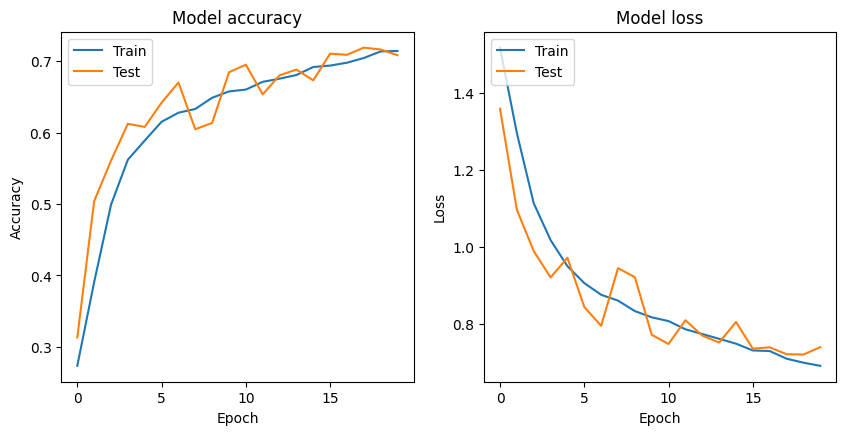

In [ ]:
# using history_7 to generate side by side plot for accuracy vs val_accuracy and loss vs val_loss

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(history_7.history['accuracy'])
plt.plot(history_7.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(2,2,2)
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


### **Plotting the Confusion Matrix for the chosen final model**

Found 128 images belonging to 4 classes.
4/4 [==============================] - 0s 22ms/step


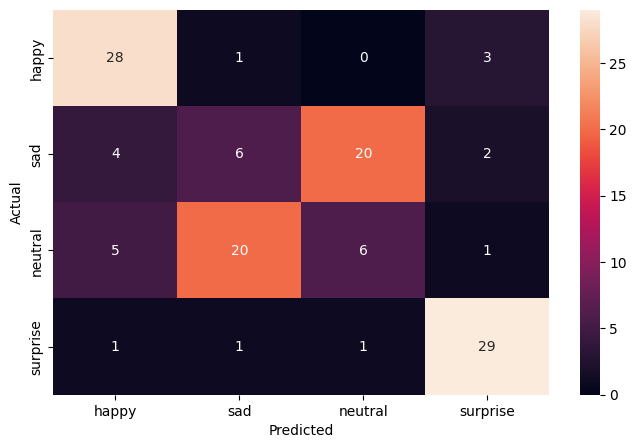

In [ ]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
test_set = datagen_test.flow_from_directory(folder_path + "test",
                                                              target_size = (img_size,img_size),
                                                              color_mode = 'grayscale',
                                                              batch_size = 128,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = True)
test_images, test_labels = next(test_set)

# Write the name of your chosen model in the blank
pred = model_7.predict(test_images)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

1/1 [==============================] - 0s 24ms/step


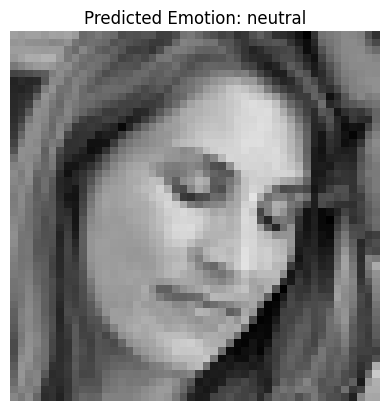

In [ ]:
# Path to the test folder
test_folder = '/content/Facial_emotion_images/test/'

# List all subfolders in the test folder
subfolders = [f.name for f in os.scandir(test_folder) if f.is_dir()]

# Choose a random subfolder
random_subfolder = random.choice(subfolders)
subfolder_path = os.path.join(test_folder, random_subfolder)

# List all files in the chosen subfolder
image_files = os.listdir(subfolder_path)

# Choose a random image from the subfolder
random_image_file = random.choice(image_files)
image_path = os.path.join(subfolder_path, random_image_file)

# Load and preprocess the image
img = load_img(image_path, target_size=(48, 48), grayscale=True)
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the image data to the range [0, 1]

# Make predictions
emotion_labels = ['angry', 'happy', 'neutral', 'sad']  # Replace with your actual emotion labels

predictions = model_7.predict(img_array)
predicted_class = np.argmax(predictions)
predicted_emotion = emotion_labels[predicted_class]

# Display the image
plt.imshow(cv2.imread(image_path))
plt.title(f"Predicted Emotion: {predicted_emotion}")
plt.axis('off')
plt.show()


**Observations and Insights:**
The complex model performed the best. The validation accuracy (71%) followed close to the training accuracy (70%).

**Observations and Insights:**
We see the model is able to predict Happy and surprise images better than other emotions. The model is confused between sad and neutral as we had noticed from examining our data.

In [ ]:
#Performance results of the models
File_Name = "FED_Full_Code_MIT.csv"
combined_df = pd.concat([results_df1, results_df2, results_df3, results_df4, results_df5, results_df6, results_df7], axis=0, ignore_index=True)
combined_df.to_csv(File_Name, index=False)
print(combined_df)

                         Model      Loss  Accuracy  F1_score  Precision  \
0            Base_NN_grayscale  1.041376  0.551989  0.227011   0.229072   
1                  Base_NN_rgb  1.033929  0.555563  0.305918   0.313905   
2            Modified_Base_rgb  1.051144  0.537693  0.229002   0.231184   
3                    VGG16_rgb  1.024084  0.553908  0.272907   0.273025   
4                 ResNetV2_rgb  1.038818  0.543120  0.280479   0.280556   
5          EfficientnetNet_rgb  1.396578  0.262691  0.147773   0.144355   
6  Complex_5layerCNN_Grayscale  0.690591  0.714409  0.230697   0.231042   

     Recall         Time  
0  0.226562   389.626723  
1  0.304688   682.009627  
2  0.234375  1061.241112  
3  0.273438  1061.241112  
4  0.281250  1199.008536  
5  0.210938  1294.746427  
6  0.234375     0.009737  


## **Conclusion:**
It appears that the most appropriate model for this dataset is a complex CNN architechture and using grayscale mode as the images are grayscale.

### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?
-- Data
Augmentation; Parameter and hyperparameter tuning, deep hidden layers also prevent the model from overfitting

### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?
-- We need to keep the model to grayscale setting to match with our input dataset.
-- Transfer learning models need to have deeper network, low learning rate and should be run longer than 20 epochs for complete evaluation as they have high number of parameters for training.

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?
-- The complex 5 layer CNN model needs to be adopted. It has the complexity and the right balance of layers to run efficiently.

##Executive summary<br>
- Cpmplex CNN models perform as better as transfer learning models. They perform better on smaller dataset compared with the transfer models.
- Transfer model run time are longer due to their larger parameters requiring more time to train.<br>

##Problem and solution summary
- To have AI based solutions deliver a more robust human like interaction or output, machines need to be able to understand the context of the interaction. This is only possible if we train the machine on non-verbal communication such as Facial Emotion Detection (FED). AI solutions for customer service, healthcare, and safety can be implemented with the ability of trained FED model with a human like understanding to detect if service delivered to customer was positive, or a patient's reaction to an environment, or if a situation is stressful for individuals.<br>

- We propoae to use machine learning techniques to build a computer vision model that can identify human facial emotions by examining facial expressions. The deep learning model will use multi class classification to output emotion prediction when a human facial emotion image is presented to the model as input.<br>
This solution will enable the business to interact with customers or patients using AI in a human like manner.<br>

##Recommendations for implementation
- We recommend using an IOT device with video camera and run a trained Deep Learning model on the device. The image captured by the camera can then be used to dynamically detect facial expressions

- Deployment of this solution is inexpensive as the hardware and software are open source and non-proprietary.
- The key risks include incorrect response based on inaccurate emotion detection as our model is only 70% accurate and there is a 30% chance for it to incorrectly predict and provide incorrect response defeating the purpose.
- We need to train our model with higher number of image dataset to improve it's accuracy.
- Further model testing needs to be conducted with larger test data and possibly live subjects.